# **Feature II - Investor Profiling**

Feature II: Recommendations for SMEs with several categories by modeling for
multiclass classification.

## **Data Load & Understanding**

In [31]:
# Importing Libraries
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import validation_curve
import joblib
import os

### **Data Load**

In [2]:
# Connecting Google Drive and Google Colab
from google.colab import drive
drive.mount('/content/gdrive')

# Retrieving Dataset
dataset = '/content/gdrive/MyDrive/Credit Score Classification Dataset.csv'
df = pd.read_csv(dataset)

Mounted at /content/gdrive


In [3]:
# Load Dataset
df

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High
...,...,...,...,...,...,...,...,...
159,29,Female,27500,High School Diploma,Single,0,Rented,Low
160,34,Male,47500,Associate's Degree,Single,0,Rented,Average
161,39,Female,62500,Bachelor's Degree,Married,2,Owned,High
162,44,Male,87500,Master's Degree,Single,0,Owned,High


### **Data Understanding**

In [4]:
df.shape

(164, 8)

In [5]:
# Display Information of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 164 non-null    int64 
 1   Gender              164 non-null    object
 2   Income              164 non-null    int64 
 3   Education           164 non-null    object
 4   Marital Status      164 non-null    object
 5   Number of Children  164 non-null    int64 
 6   Home Ownership      164 non-null    object
 7   Credit Score        164 non-null    object
dtypes: int64(3), object(5)
memory usage: 10.4+ KB


View information from the dataset using the `info(`) function where output will be given in the form of a list of column names, information on the amount of non-null data in each column and the data type of each column. From the data above, it is known that the data consists of 8 columns with a total of 164 rows.

**Exploratory Descriptive Statistic:** Information about the descriptive statistics of the data set can be found using the `.describe()` function. The information obtained is a summary of the measure of central tendency and measure of spread from each column containing numerical values in the data set.

In [6]:
df.describe()

,Age,Income,Number of Children
count,164.000000,164.000000,164.000000
mean,37.975610,83765.243902,0.652439
std,8.477289,32457.306728,0.883346
min,25.000000,25000.000000,0.000000
25%,30.750000,57500.000000,0.000000
50%,37.000000,83750.000000,0.000000
75%,45.000000,105000.000000,1.000000
max,53.000000,162500.000000,3.000000


## **Data Pre-Processing**

### **Data Cleaning**

In [7]:
# Finding Missing Data
df.isnull().sum()

Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

In [8]:
# Remove Missing Values
df.dropna(inplace=True)

In [9]:
# Check Null Values
df.isna().sum()

Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

In [10]:
# Check for Duplicate Data
df.duplicated().sum()

62

In [11]:
# Delete all duplicate data except the first data
df.drop_duplicates(keep = 'first', inplace = True)

In [12]:
# Check for Duplicate Data
df.duplicated().sum()

0

After checking and deleting missing and duplicate values, the previously existing data contained 62 duplicate rows, therefore the duplicate data had to be deleted. So the new data is in the following table.

In [13]:
df

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High
...,...,...,...,...,...,...,...,...
130,31,Male,95000,Doctorate,Single,0,Rented,High
131,26,Female,55000,Bachelor's Degree,Married,1,Owned,Average
132,32,Male,85000,Master's Degree,Single,0,Rented,High
133,29,Female,68000,Doctorate,Married,2,Owned,Average


### **Data Manipulation**

In [14]:
# Change column names
df.rename(columns={
    'Credit Score': 'Label'
}, inplace=True)

# Returns a DataFrame after changing column names
df

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Label
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High
...,...,...,...,...,...,...,...,...
130,31,Male,95000,Doctorate,Single,0,Rented,High
131,26,Female,55000,Bachelor's Degree,Married,1,Owned,Average
132,32,Male,85000,Master's Degree,Single,0,Rented,High
133,29,Female,68000,Doctorate,Married,2,Owned,Average


**Convert USD to IDR:** The data on income is data on a person's annual income in USD. To adjust to IDR, need to make a conversion. The conversion is carried out by multiplying the USD by the IDR based on the exchange rate of 1 USD = 15,504 IDR (data as of 4 December 2023).

In [15]:
# USD to IDR conversion rate
rate_usd_to_idr = 15504

# Function for conversion
def convert_to_idr(income_usd):
     return income_usd * rate_usd_to_idr

# Apply the conversion function to the 'Income' column
df['Income'] = df['Income'].apply(convert_to_idr)

# Returns the DataFrame after conversion
df

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Label
0,25,Female,775200000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,1550400000,Master's Degree,Married,2,Owned,High
2,35,Female,1162800000,Doctorate,Married,1,Owned,High
3,40,Male,1938000000,High School Diploma,Single,0,Owned,High
4,45,Female,1550400000,Bachelor's Degree,Married,3,Owned,High
...,...,...,...,...,...,...,...,...
130,31,Male,1472880000,Doctorate,Single,0,Rented,High
131,26,Female,852720000,Bachelor's Degree,Married,1,Owned,Average
132,32,Male,1317840000,Master's Degree,Single,0,Rented,High
133,29,Female,1054272000,Doctorate,Married,2,Owned,Average


**Adjustment of US GDP with ID GDP:** Then the income resulting from the conversion is adjusted to Indonesia's GDP, which is the United States' GDP (divided by 16). This is because there is a gap between the GDP of the United States which is 77,469 USD and the GDP of Indonesia which is 4,798 USD, which means that the GDP of the United States can be said to be around 16 times larger than the GDP of Indonesia. Because this model will later be used in Indonesia, adjustments need to be made to the existing income of Indonesian society.

Data taken from https://countryeconomy.com/countries/compare/indonesia/usa for GDP in 2022.

In [16]:
# Divide the converted 'Income' by 16
df['Income']/=16
df

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Label
0,25,Female,48450000.0,Bachelor's Degree,Single,0,Rented,High
1,30,Male,96900000.0,Master's Degree,Married,2,Owned,High
2,35,Female,72675000.0,Doctorate,Married,1,Owned,High
3,40,Male,121125000.0,High School Diploma,Single,0,Owned,High
4,45,Female,96900000.0,Bachelor's Degree,Married,3,Owned,High
...,...,...,...,...,...,...,...,...
130,31,Male,92055000.0,Doctorate,Single,0,Rented,High
131,26,Female,53295000.0,Bachelor's Degree,Married,1,Owned,Average
132,32,Male,82365000.0,Master's Degree,Single,0,Rented,High
133,29,Female,65892000.0,Doctorate,Married,2,Owned,Average


**Convert Annual Income to Monthly Income:** To make it easier for users to enter data, the data which was originally annual income is converted to monthly income. In this case, Income is divided by 12 (the number of months in one year).

In [17]:
# Divide the converted 'Income' by 12
df['Income']/=12
df

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Label
0,25,Female,4037500.0,Bachelor's Degree,Single,0,Rented,High
1,30,Male,8075000.0,Master's Degree,Married,2,Owned,High
2,35,Female,6056250.0,Doctorate,Married,1,Owned,High
3,40,Male,10093750.0,High School Diploma,Single,0,Owned,High
4,45,Female,8075000.0,Bachelor's Degree,Married,3,Owned,High
...,...,...,...,...,...,...,...,...
130,31,Male,7671250.0,Doctorate,Single,0,Rented,High
131,26,Female,4441250.0,Bachelor's Degree,Married,1,Owned,Average
132,32,Male,6863750.0,Master's Degree,Single,0,Rented,High
133,29,Female,5491000.0,Doctorate,Married,2,Owned,Average


### **Encoding**

In [18]:
# Make dictionary for encoding
Gender_encoding = {'Male': 0, 'Female': 1}
Education_encoding = {'High School Diploma': 0, "Associate's Degree": 1, "Bachelor's Degree": 2, "Master's Degree": 3, "Doctorate": 4}
Marital_encoding = {'Single': 0, 'Married': 1}
Home_encoding = {'Rented': 0, 'Owned': 1}
Label_encoding = {'Low': 0, 'Average': 1, 'High' : 2}

# Doing label encoding using map method
df['Gender'] = df['Gender'].map(Gender_encoding)
df['Education'] = df['Education'].map(Education_encoding)
df['Marital Status'] = df['Marital Status'].map(Marital_encoding)
df['Home Ownership'] = df['Home Ownership'].map(Home_encoding)
df['Label'] = df['Label'].map(Label_encoding)

In [19]:
df

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Label
0,25,1,4037500.0,2,0,0,0,2
1,30,0,8075000.0,3,1,2,1,2
2,35,1,6056250.0,4,1,1,1,2
3,40,0,10093750.0,0,0,0,1,2
4,45,1,8075000.0,2,1,3,1,2
...,...,...,...,...,...,...,...,...
130,31,0,7671250.0,4,0,0,0,2
131,26,1,4441250.0,2,1,1,1,1
132,32,0,6863750.0,3,0,0,0,2
133,29,1,5491000.0,4,1,2,1,1


### **Handling Imbalance Data (SMOTE)**

In [20]:
# Counting Stunting Case for each case
df['Label'].value_counts()

2    75
1    21
0     6
Name: Label, dtype: int64

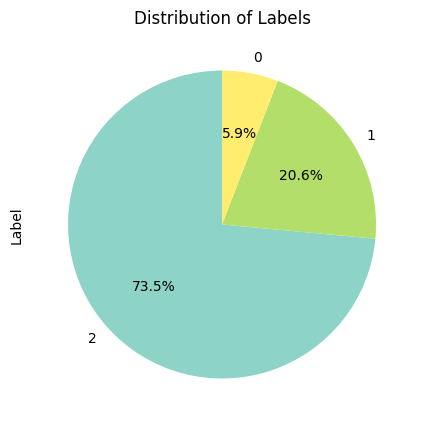

In [21]:
# Counts the number of each label
label_counts = df['Label'].value_counts()

# Sort labels based on their number from largest to smallest
label_counts = label_counts.sort_values(ascending=False)

# Create a pie chart
plt.figure(figsize=(5, 5))
label_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')

# Add a title
plt.title('Distribution of Labels')

# Display graphics
plt.show()

Based on the pie chart above, it can be seen that 73.5% of the data in the `status` column is labeled **High (2)**, while the remaining 20.6% is labeled **Average (1)** and 5.9% is labeled **Low (0)**. So it can be concluded that the data does not have balanced proportions (imbalanced data) so it is necessary to handle the data.

In [22]:
# Separating the Feature and Labels
X = df[['Age', 'Gender', 'Income', 'Education', 'Marital Status',	'Number of Children', 'Home Ownership']]
y = df["Label"]

smote = SMOTE(random_state=13)

# Fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', y.value_counts())
print(' ')
print('Resample dataset shape', y_smote.value_counts())

Original dataset shape 2    75
1    21
0     6
Name: Label, dtype: int64
 
Resample dataset shape 2    75
1    75
0    75
Name: Label, dtype: int64


In [23]:
X_smote

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership
0,25,1,4.037500e+06,2,0,0,0
1,30,0,8.075000e+06,3,1,2,1
2,35,1,6.056250e+06,4,1,1,1
3,40,0,1.009375e+07,0,0,0,1
4,45,1,8.075000e+06,2,1,3,1
...,...,...,...,...,...,...,...
220,31,0,4.754318e+06,1,0,0,0
221,30,0,5.443448e+06,2,0,0,0
222,31,0,5.546341e+06,2,0,0,0
223,31,0,4.891153e+06,2,0,0,0


In [24]:
y_smote

0      2
1      2
2      2
3      2
4      2
      ..
220    1
221    1
222    1
223    1
224    1
Name: Label, Length: 225, dtype: int64

## **Exploratory Data Analysis (EDA)**

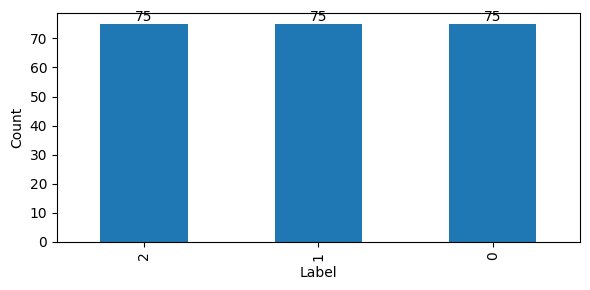

In [25]:
# Counts the number of each label
label_counts = y_smote.value_counts()

# Sort labels based on their number from largest to smallest
label_counts = label_counts.sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(6, 3))
label_counts.plot(kind='bar')

# Add x-axis (label) and y-axis (number) labels
plt.xlabel('Label')
plt.ylabel('Count')

# Add text with respective amounts to each bar
for i, v in enumerate(label_counts):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=10)

# Display graphics
plt.tight_layout()  # To arrange the layout so that it does not overlap
plt.show()

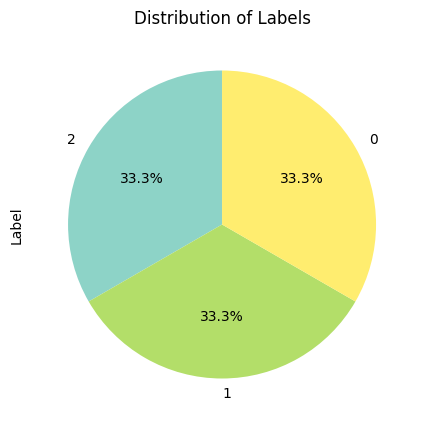

In [26]:
# Counts the number of each label
label_counts = y_smote.value_counts()

# Sort labels based on their number from largest to smallest
label_counts = label_counts.sort_values(ascending=False)

# Create a pie chart
plt.figure(figsize=(5, 5))
label_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')

# Add a title
plt.title('Distribution of Labels')

# Display graphics
plt.show()

After handling data imbalance using SMOTE, based on the bar and pie charts above, it can be seen that each label has the same and balanced proportion, namely 33.33% or 75 for each label.

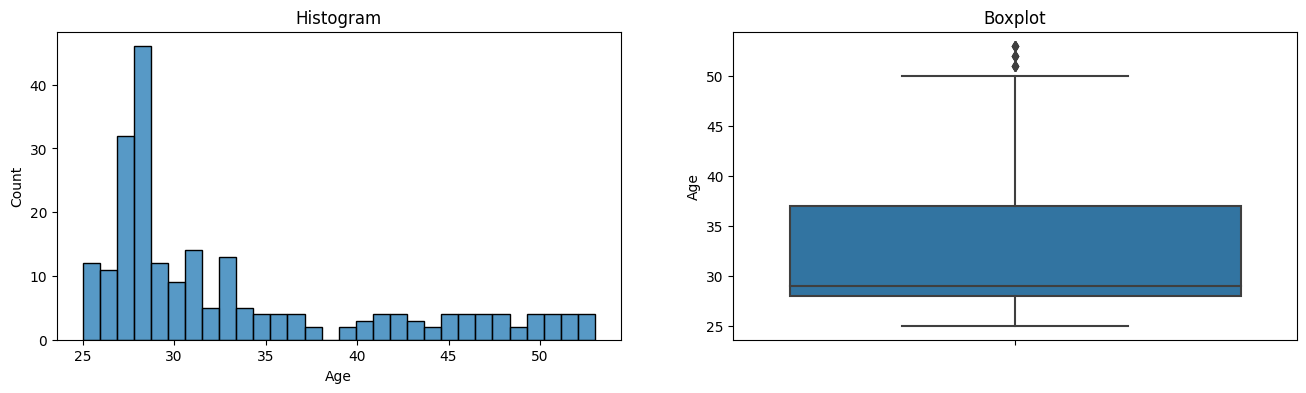

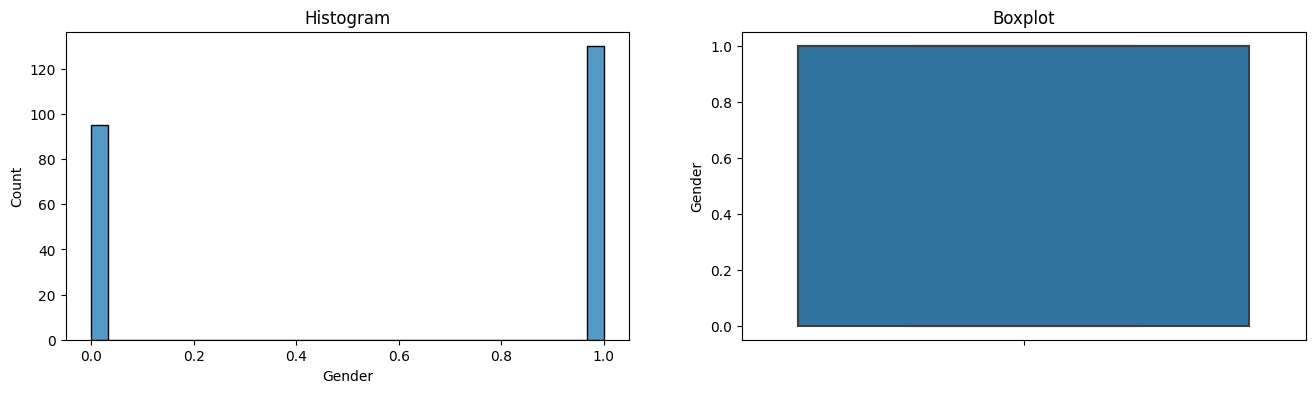

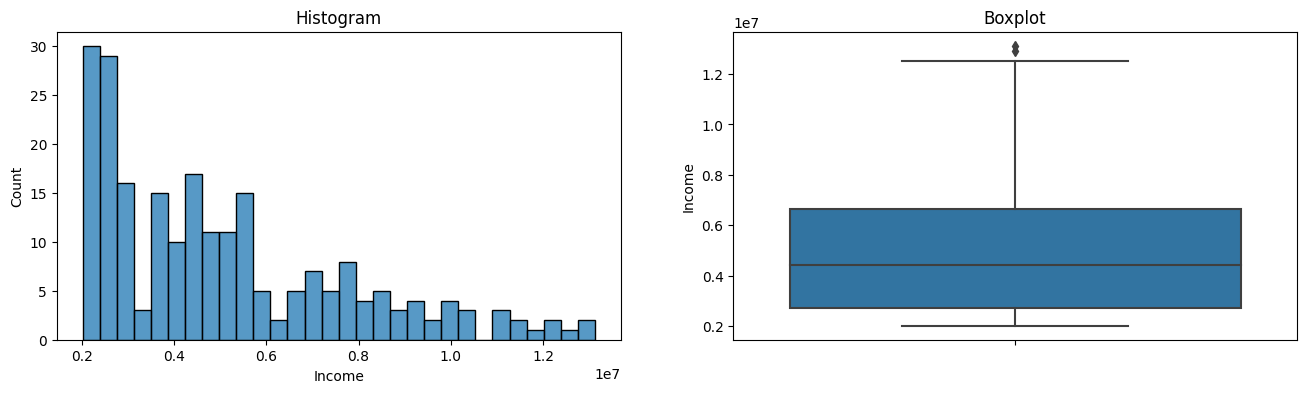

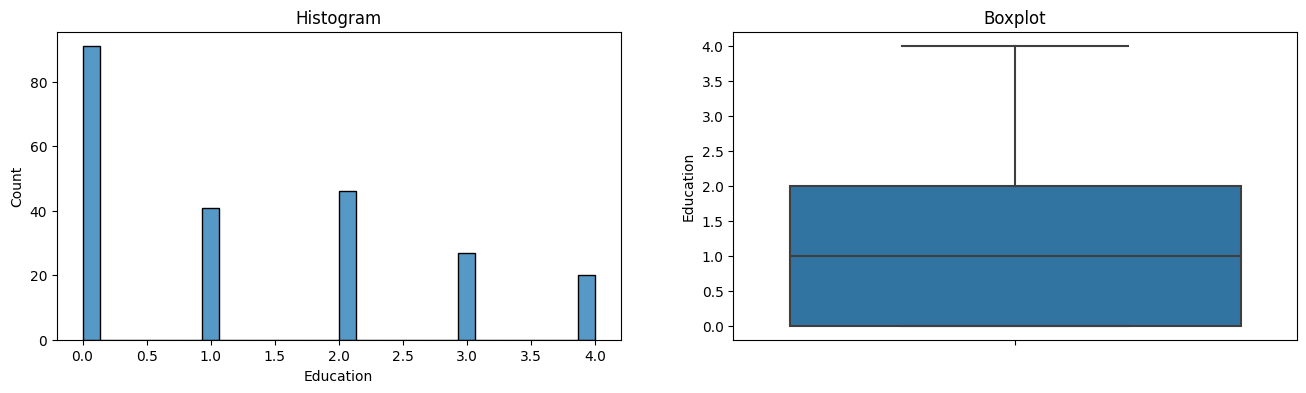

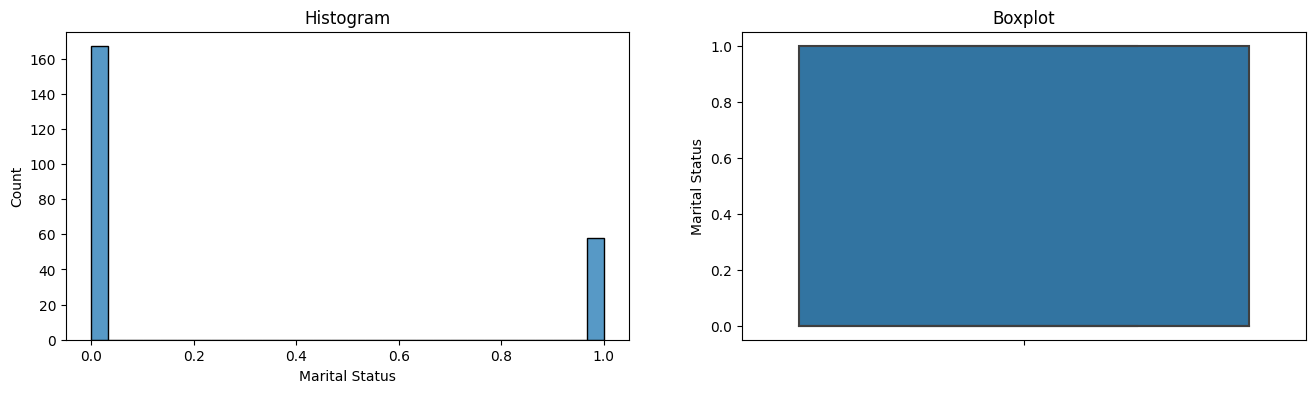

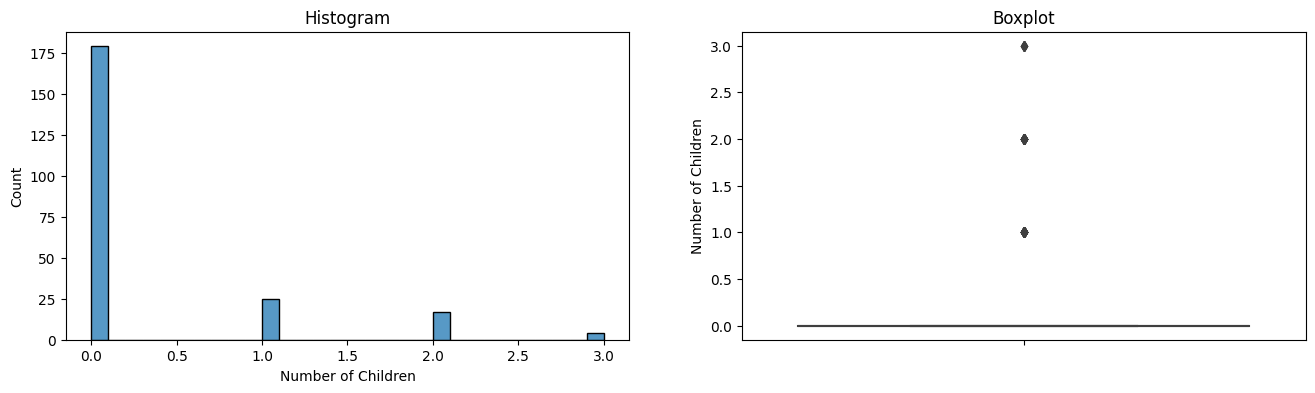

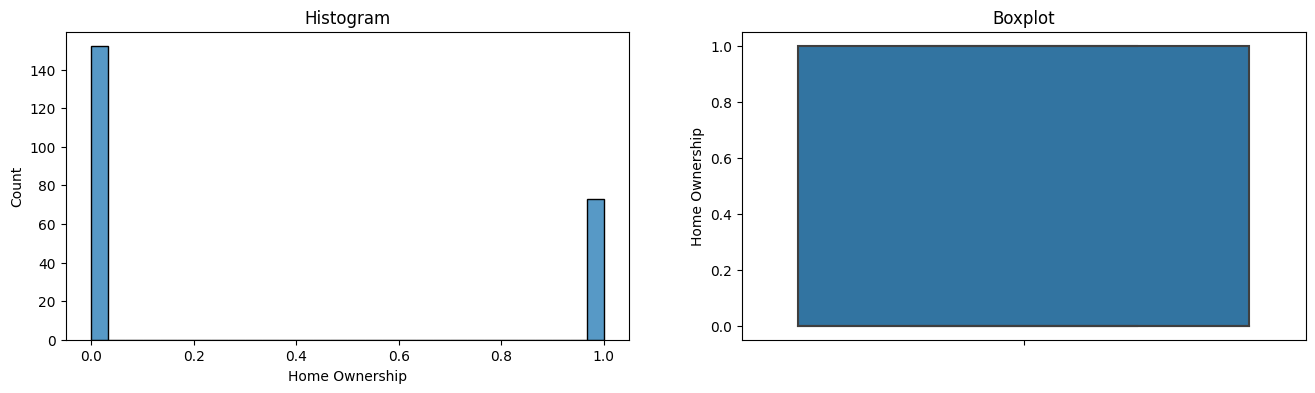

In [27]:
def diagnostic_plots(df,variable):
    plt.figure(figsize=(16,4))

    #Histogram
    plt.subplot(1,2,1)
    sns.histplot(df[variable],bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

diagnostic_plots(X_smote, 'Age')
diagnostic_plots(X_smote, 'Gender')
diagnostic_plots(X_smote, 'Income')
diagnostic_plots(X_smote, 'Education')
diagnostic_plots(X_smote, 'Marital Status')
diagnostic_plots(X_smote, 'Number of Children')
diagnostic_plots(X_smote, 'Home Ownership')

In [28]:
print('Skewness of Age:', X_smote['Age'].skew())
print('Skewness of Gender:', X_smote['Gender'].skew())
print('Skewness of Income:', X_smote['Income'].skew())
print('Skewness of Education:', X_smote['Education'].skew())
print('Skewness of Marital Status:', X_smote['Marital Status'].skew())
print('Skewness of Number of Children:', X_smote['Number of Children'].skew())
print('Skewness of Home Ownership:', X_smote['Home Ownership'].skew())

Skewness of Age: 1.147560130845823
Skewness of Gender: -0.31706256648363484
Skewness of Income: 0.9873552686630469
Skewness of Education: 0.6195885433306242
Skewness of Marital Status: 1.1149738216739866
Skewness of Number of Children: 2.2093881210170156
Skewness of Home Ownership: 0.7550127269704379


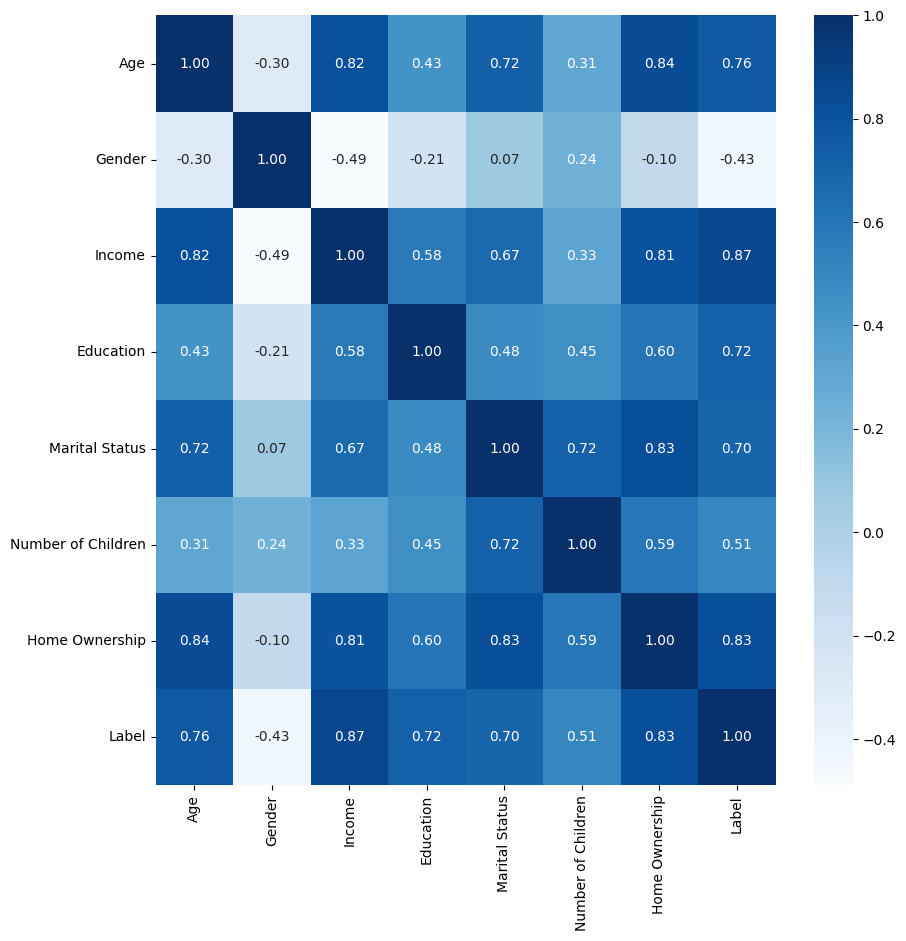

In [29]:
# Combine X_smote and y_smote into a single DataFrame
df_smote = pd.concat([X_smote, y_smote], axis=1)

# Plot the heatmap
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_smote.corr(), annot=True, cmap='Blues', fmt=".2f", ax=ax)

# Show the plot
plt.show()

## **Modelling & Evaluation**

In [32]:
scaler = StandardScaler()
X_smote_scaled = scaler.fit_transform(X_smote)

In [34]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_smote_scaled, y_smote, test_size=0.2, random_state=42)

### **Modelling**

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a Sequential model for tabular data (MLP)
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3 class output

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model on training data
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
6/6 [==============================] - 2s 86ms/step - loss: 0.9819 - accuracy: 0.6778 - val_loss: 0.8565 - val_accuracy: 0.8444
Epoch 2/100
6/6 [==============================] - 0s 18ms/step - loss: 0.7282 - accuracy: 0.9056 - val_loss: 0.6856 - val_accuracy: 0.9111
Epoch 3/100
6/6 [==============================] - 0s 16ms/step - loss: 0.5545 - accuracy: 0.9056 - val_loss: 0.5498 - val_accuracy: 0.9556
Epoch 4/100
6/6 [==============================] - 0s 13ms/step - loss: 0.4364 - accuracy: 0.9444 - val_loss: 0.4357 - val_accuracy: 0.9556
Epoch 5/100
6/6 [==============================] - 0s 22ms/step - loss: 0.3482 - accuracy: 0.9444 - val_loss: 0.3455 - val_accuracy: 0.9556
Epoch 6/100
6/6 [==============================] - 0s 16ms/step - loss: 0.2840 - accuracy: 0.9444 - val_loss: 0.2753 - val_accuracy: 0.9556
Epoch 7/100
6/6 [==============================] - 0s 19ms/step - loss: 0.2338 - accuracy: 0.9444 - val_loss: 0.2234 - val_accuracy: 0.9556
Epoch 8/100
6/6 [===

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 9475 (37.01 KB)
Trainable params: 9475 (37.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
model.predict(np.array([[25,	1,	4.037500e+06,	2,	0,	0,	0]]))

1/1 [==============================] - 0s 106ms/step


array([[0., 0., 1.]], dtype=float32)

### **Model Evaluation**

2/2 [==============================] - 0s 6ms/step


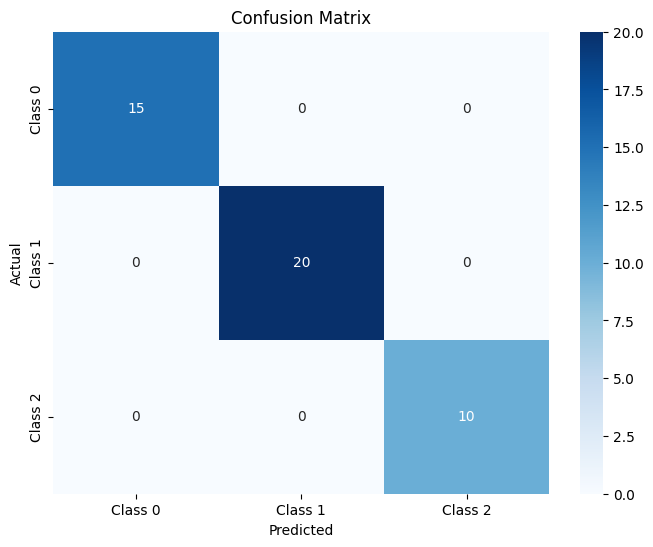

In [39]:
# Predict on the test data
y_probabilities = model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred = y_probabilities.argmax(axis=-1)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

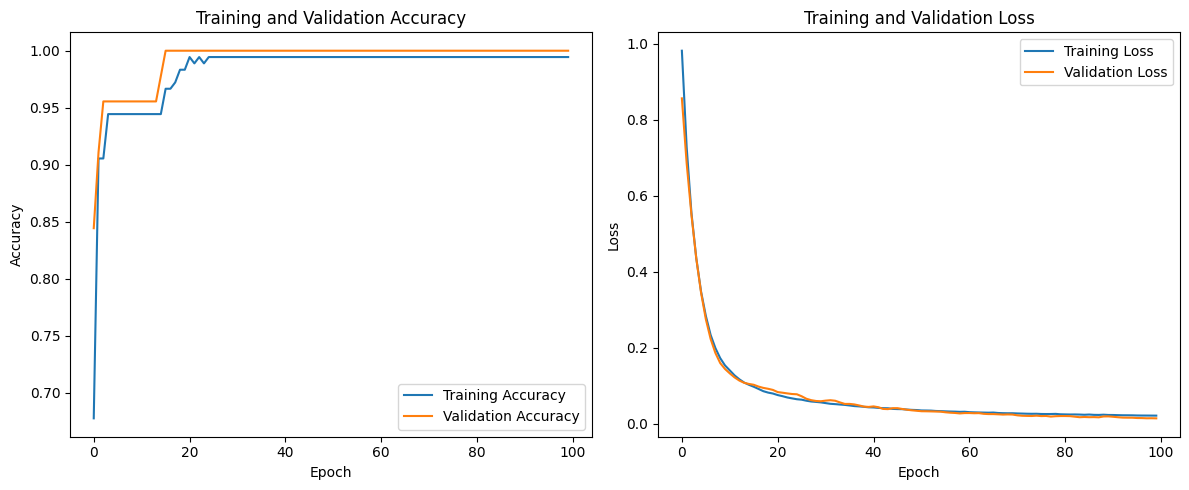

In [40]:
# Plot training and validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training and validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [41]:
# Model Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[15  0  0]
 [ 0 20  0]
 [ 0  0 10]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        10

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## **Save Model**

In [42]:
from google.colab import drive
import os
from tensorflow.keras.models import save_model

# Save model to .h5
drive.mount('/content/drive')
os.makedirs('/content/drive/MyDrive/', exist_ok=True)

# Save the MLP model (.h5) to the Google Drive folder
model_filename = '/content/drive/MyDrive/bevest_feature2_model.h5'
model.save(model_filename)

print(f"Model saved successfully to {model_filename}")

Mounted at /content/drive
Model saved successfully to /content/drive/MyDrive/bevest_feature2_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
